### **Importing Libraries**

In [1]:
import numpy as np
from numpy.random import normal
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NUM_SIMULATIONS = 10000
N = 12

### **Simulating stock price movement using log-normal process**

In [3]:
def generate_stock_prices(S0 = 50, sigma = 0.2, T = 1, mu = 0.1):
  dt = T / N

  stock_prices = [S0]

  for _ in range(N):
    stock_prices.append(stock_prices[-1] * np.exp((mu - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * normal(0, 1)))  # Log-normal Stochastic Process

  return stock_prices

### **Plotting stock prices (Monte Carlo Simulation)**

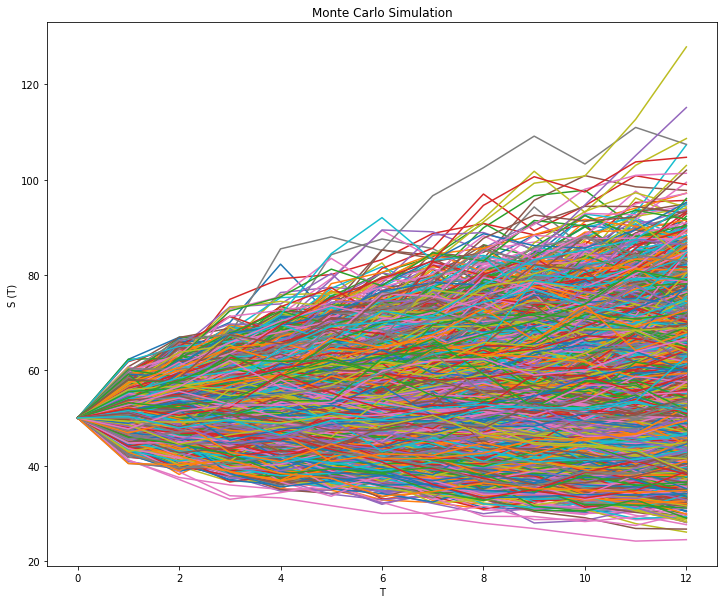

In [4]:
price_data = []

for _ in range(NUM_SIMULATIONS):
	price_data.append(generate_stock_prices())					# Generating a time series of stock price for each simulation

price_data = pd.DataFrame(price_data)
price_data = price_data.T

plt.figure(figsize = (12, 10))
plt.plot(price_data)
plt.xlabel('T')
plt.ylabel('S (T)')
plt.title("Monte Carlo Simulation")
plt.show()

### **Generating payoffs for each simulation**

In [5]:
Sb = int(input("input1: "))                               # Barrier level of the option

input1: 5


In [6]:
K = 70                                                    # Strike price of the option

payoffs = []

for i in price_data:
  knocked_out = False
  for t in range(N):
    if price_data[i][t] < Sb:                             # Monitoring the option at regular intervals
      payoffs.append(0)                                   # Option gets knocked out when stock price goes below the barrier level
      knocked_out = True
      break
		
  if not knocked_out:
    payoffs.append(max(0, K - price_data[i][N-1]))        # For put option: Payoff = Max(0, K - S[T])
    

### **Calculating option value**

In [7]:
option_value = np.average(payoffs)      # We will average out payoffs of all the simulations to get the expected value
                                        # of the option. This value obtained is the future value and must be discounted
                                        # to get the present value

r = 0.1     # Discount rate
T = 1

option_value_curr = option_value * np.exp(-r*T)           # Present value of the option

print(option_value_curr)

14.328895765987776
